# 第六章　照明設備 / Chapter 6 Lighting

In [1]:
import numpy as np

# 試算例

### 初期条件

In [2]:
def get_default_lighting():
    A_A = 120.08
    A_MR = 29.81
    A_OR = 51.34
    
    L = {"MR_installed" : "設置しない","MR_power" : None,"MR_multi" : None,"MR_dimming" : '採用しない',
        "has_OR" : True,"OR_installed" : "設置しない","OR_power" : None,"OR_dimming" : '採用しない',
        "has_NO" : True,"NO_installed" : "設置しない","NO_power" : None,"NO_sensor" : '採用しない'
        }
    
    return A_A, A_MR, A_OR, L

### 計算

In [3]:
def calc_results(A_A, A_MR, A_OR, L):

    from pyhees.section2_1_b import get_f_prim
    from pyhees.section6 import calc_E_E_L_d_t
    from pyhees.section2_1_c import get_n_p

    n_p = get_n_p(A_A)

    # 電気消費量
    E_E_L_d_t = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)

    # 電気の一次エネルギー換算係数
    f_prim = get_f_prim()

    E_L_d_t = E_E_L_d_t * f_prim / 1000
    print(f'E_L_d_t = {np.sum(E_L_d_t)}MJ/a')
    
    return E_L_d_t

In [4]:
def get_each_graph(_E_E_L_d_t):

    import matplotlib.pyplot as plt

    _E_E_L_d = np.sum(_E_E_L_d_t.reshape(365,24), axis = 1)

    fig = plt.figure(figsize = (20,7))

    grh_day = fig.add_subplot(211)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(_E_E_L_d, label = "E_L")
    grh_day.legend()

    grh_date = fig.add_subplot(212)
    grh_date.set_ylabel('MJ/h')
    grh_date.set_xlabel('hour')
    grh_date.plot(_E_E_L_d_t.reshape(365,24)[334], label = "E_L:12/1")
    grh_date.plot(_E_E_L_d_t.reshape(365,24)[59], label = "E_L:3/1")
    grh_date.legend()

    plt.show()


### 計算条件1

初期条件での計算

In [5]:
A_A, A_MR, A_OR, L = get_default_lighting()

E_L_d_t_1 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 5211.890116722586MJ/a


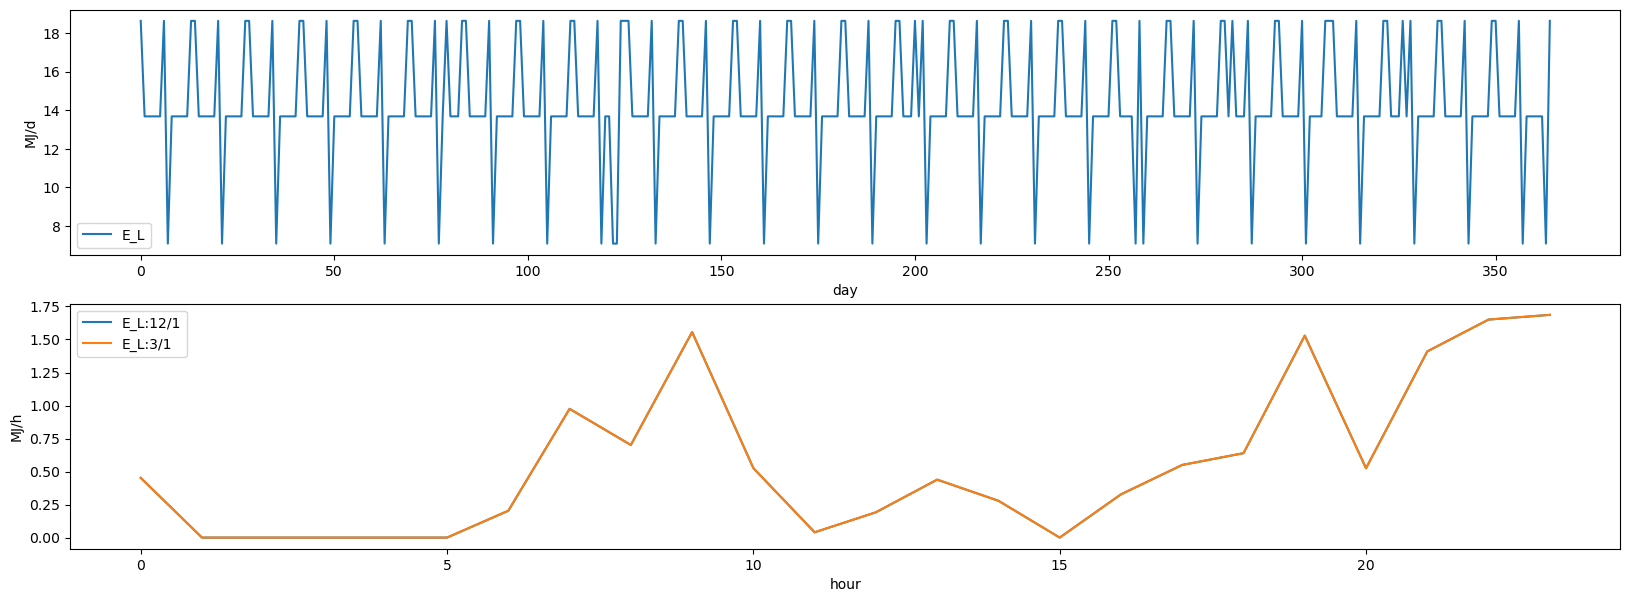

In [6]:
get_each_graph(E_L_d_t_1)

### 計算条件2

- 主居室LED照明、その他の居室LED照明、非居室LED照明に変更

In [7]:
A_A, A_MR, A_OR, L = get_default_lighting()
L['MR_installed'] = '設置する'
L['MR_power'] = 'すべての機器においてLEDを使用している'
L['OR_installed'] = '設置する'
L['OR_power'] = 'すべての機器においてLEDを使用している'
L['NO_installed'] = '設置する'
L['NO_power'] = 'すべての機器においてLEDを使用している'

E_L_d_t_2 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 5211.890116722586MJ/a


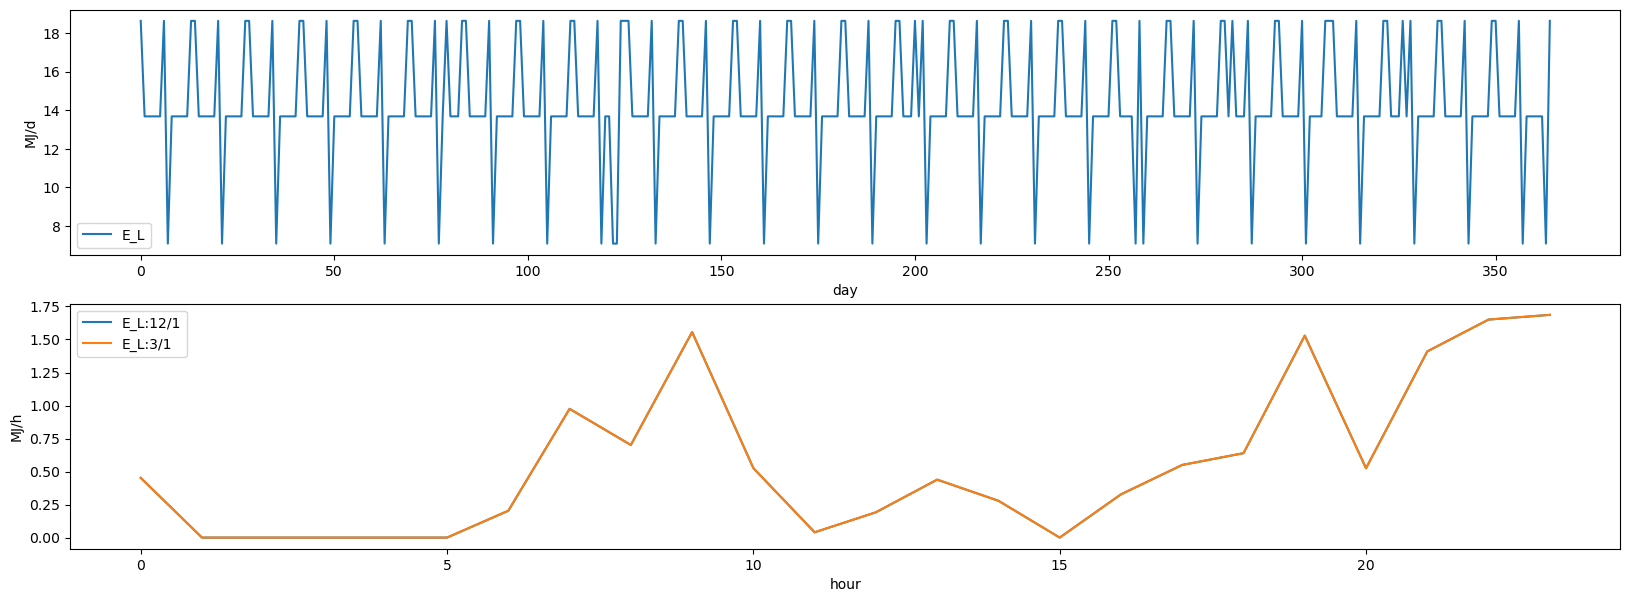

In [8]:
get_each_graph(E_L_d_t_2)

### 計算条件3

- 主居室、その他の居室、非居室で白熱灯以外を使用しているに変更

In [9]:
A_A, A_MR, A_OR, L = get_default_lighting()
L['MR_installed'] = '設置する'
L['MR_power'] = 'すべての機器において白熱灯以外を使用している'
L['OR_installed'] = '設置する'
L['OR_power'] = 'すべての機器において白熱灯以外を使用している'
L['NO_installed'] = '設置する'
L['NO_power'] = 'すべての機器において白熱灯以外を使用している'

E_L_d_t_3 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 6699.188310071896MJ/a


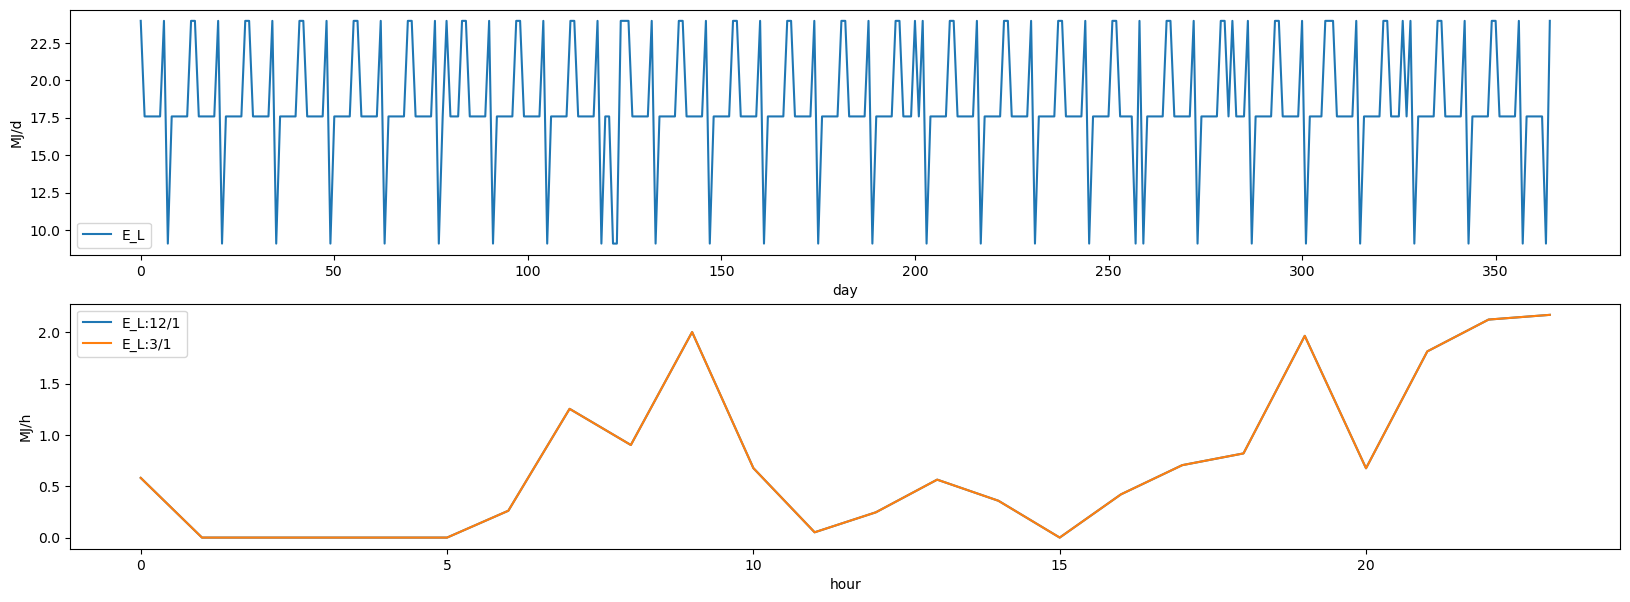

In [10]:
get_each_graph(E_L_d_t_3)

### 計算条件4

- 主居室、その他の居室、非居室で白熱灯を使用しているに変更

In [11]:
A_A, A_MR, A_OR, L = get_default_lighting()
L['MR_installed'] = '設置する'
L['MR_power'] = 'いずれかの機器において白熱灯を使用している'
L['OR_installed'] = '設置する'
L['OR_power'] = 'いずれかの機器において白熱灯を使用している'
L['NO_installed'] = '設置する'
L['NO_power'] = 'いずれかの機器において白熱灯を使用している'

E_L_d_t_4 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 13662.456349634307MJ/a


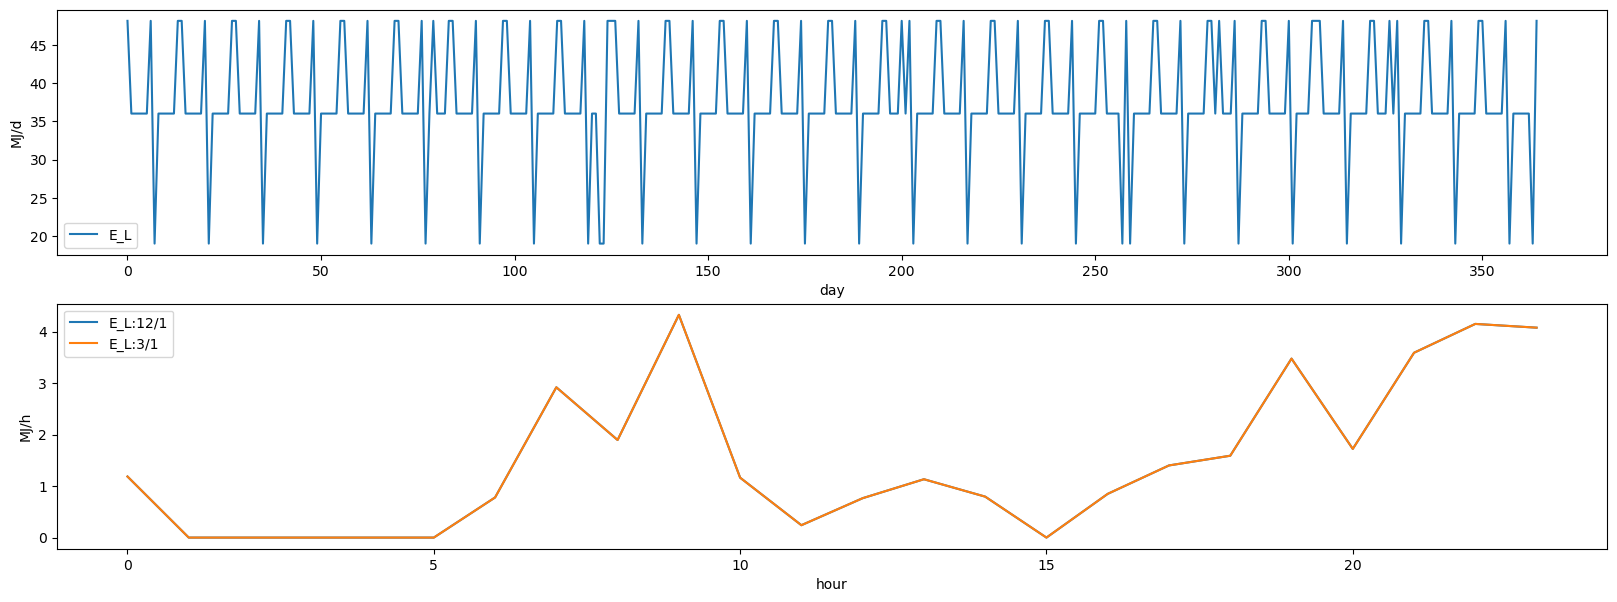

In [12]:
get_each_graph(E_L_d_t_4)

### 計算条件5

- 主居室：LED照明設置する。多灯分散、調光制御あり。
- その他の居室：LED照明設置する。調光制御あり。
- 非居室：LED照明設置する。人感センサーあり。

In [13]:
A_A, A_MR, A_OR, L = get_default_lighting()
L['MR_installed'] = '設置する'
L['MR_power'] = 'すべての機器においてLEDを使用している'
L['MR_multi'] = '採用する'
L['MR_dimming'] = '採用する'
L['OR_installed'] = '設置する'
L['OR_power'] = 'すべての機器においてLEDを使用している'
L['OR_dimming'] = '採用する'
L['NO_installed'] = '設置する'
L['NO_power'] = 'すべての機器においてLEDを使用している'
L['NO_sensor'] = '採用する'

E_L_d_t_5 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 4414.231870095704MJ/a


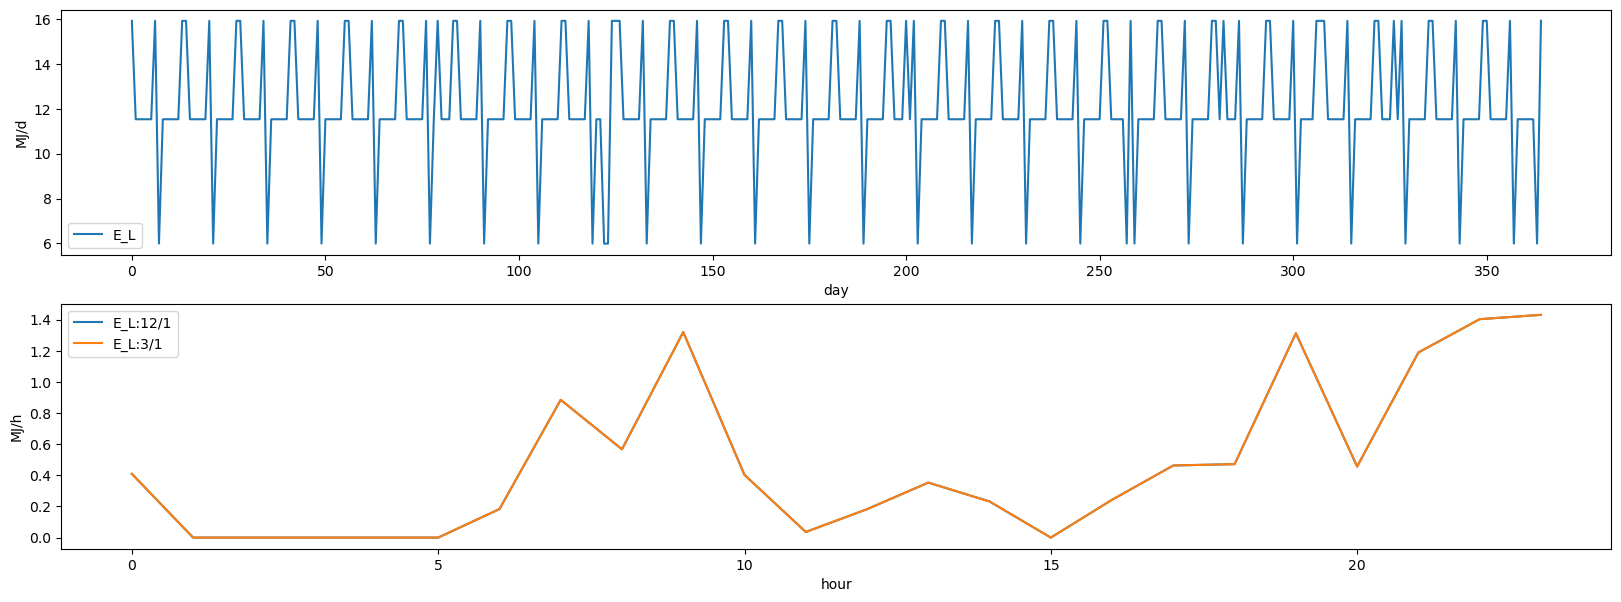

In [14]:
get_each_graph(E_L_d_t_5)

### 計算条件6

- その他の居室なし

In [15]:
A_A, A_MR, A_OR, L = get_default_lighting()
L["has_OR"] = None
A_OR = 0

E_L_d_t_6 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 3936.5506672997617MJ/a


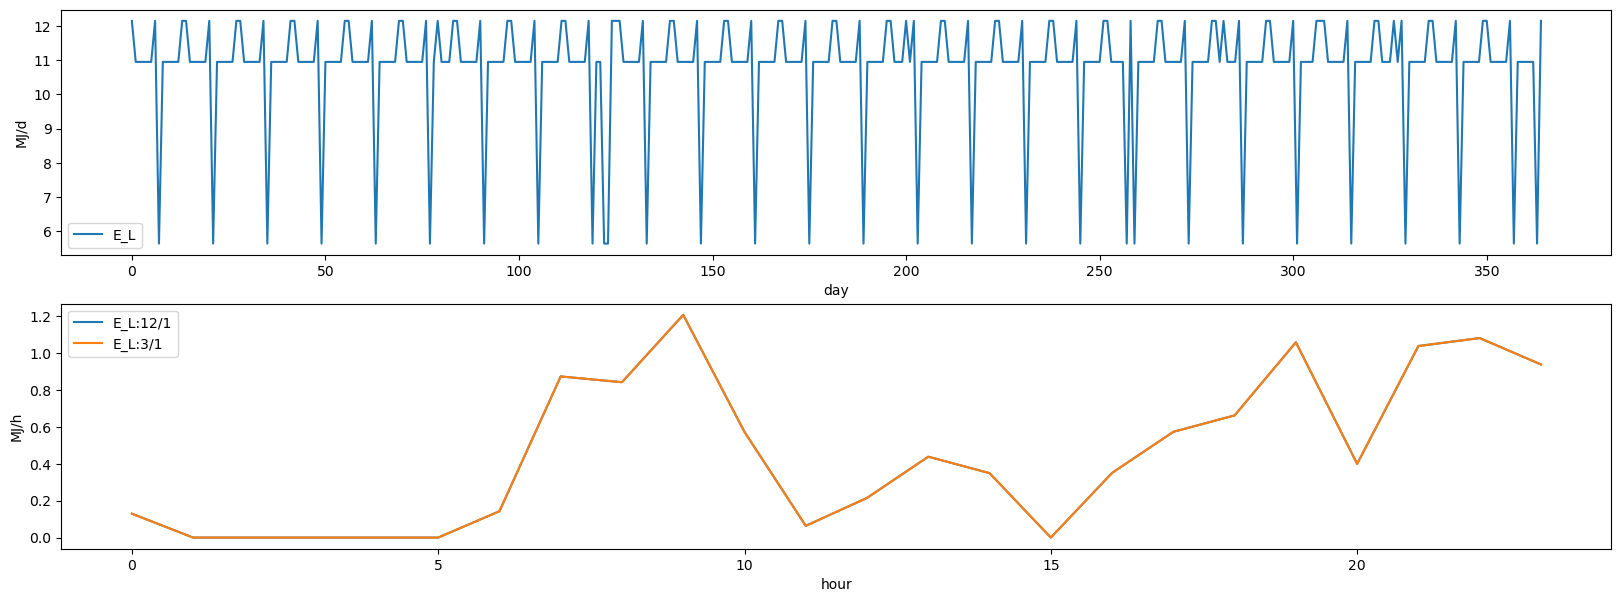

In [16]:
get_each_graph(E_L_d_t_6)

### 計算条件7

- その他の居室、非居室なし

In [17]:
A_A, A_MR, A_OR, L = get_default_lighting()
L["has_OR"] = None
L["has_NO"] = None
A_MR = 120.08
A_OR = 0
E_L_d_t_7 = calc_results(A_A, A_MR, A_OR, L)

E_L_d_t = 7731.388916039168MJ/a


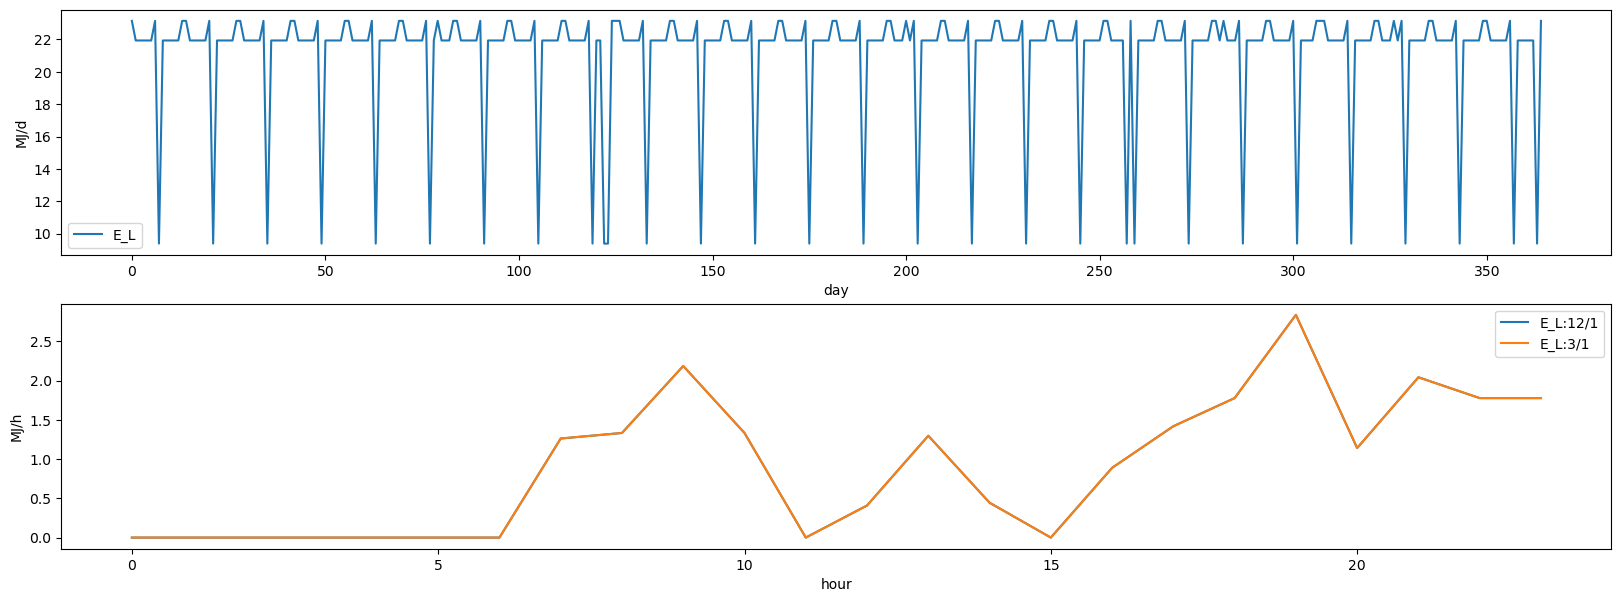

In [18]:
get_each_graph(E_L_d_t_7)

## 比較

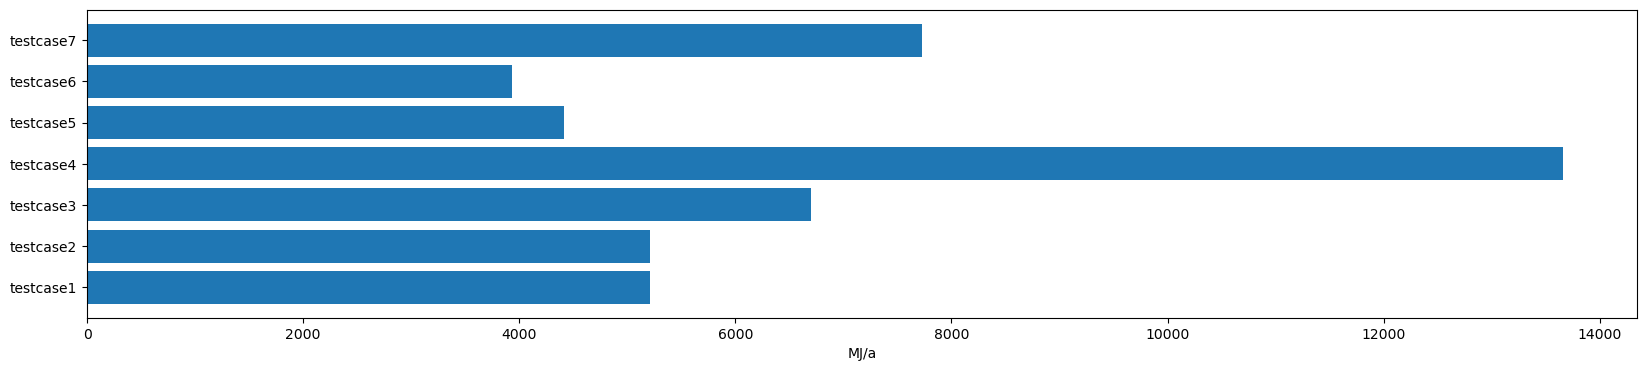

In [19]:
import matplotlib.pyplot as plt

dat = {"testcase1":sum(E_L_d_t_1),"testcase2" : sum(E_L_d_t_2), "testcase3" : sum(E_L_d_t_3), "testcase4" : sum(E_L_d_t_4), 
       "testcase5" : sum(E_L_d_t_5), "testcase6" : sum(E_L_d_t_6), "testcase7" : sum(E_L_d_t_7)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("MJ/a")
plt.show()
